Pairs of chains to compute distances:
A B lengths: 24 122
A C lengths: 24 118
B A lengths: 122 24
C A lengths: 118 24


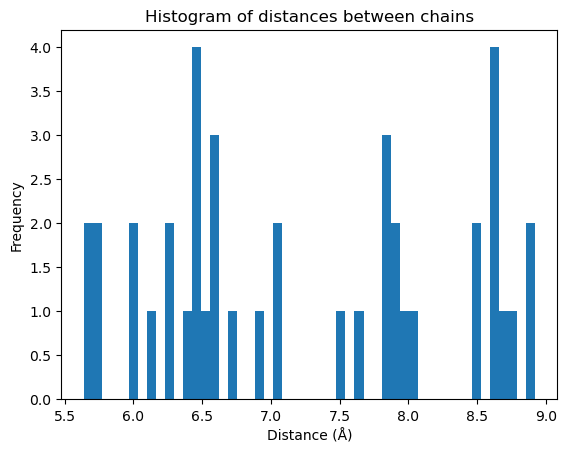

Average score: 0.5966308202986417
Number of contacts: 39
Total score: 23.268601991647024
Contacts index: {'A': {0, 1, 2, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 21}, 'B': {33, 34, 44, 45, 46, 22, 23, 25, 26, 27, 29, 30, 31}, 'C': {9, 12, 13, 16, 17, 20, 21, 24, 25, 28}}


In [25]:
from geometry_functions import CA_coords, get_score, get_all_pairs, general_get_contacts
import matplotlib.pyplot as plt

pdb_file = 'input_pdbs/8.pdb'
omit_chain_pairs = [('B', 'C')]
pairs = get_all_pairs(pdb_file, omit_chain_pairs)
distances, contacts_index, n_contacts = general_get_contacts(pairs, min_distance=2, max_distance=9)

plt.hist(distances, bins=50)
plt.xlabel('Distance (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of distances between chains')
plt.show()

score = get_score(distances)
print('Average score:', score)
print('Number of contacts:', n_contacts)
print('Total score:', score * n_contacts)
print('Contacts index:', contacts_index)

In [24]:
from Bio.PDB import PDBParser, PDBIO
parser = PDBParser(QUIET=True)

structure = parser.get_structure('struct', pdb_file)

for model in structure:
    for chain in model:
        chID = chain.id
        residues = list(chain)
        first_residue_in_chain = residues[0].id[1]
        for idx, residue in enumerate(residues):
            resnum_pdb = residue.id[1]
            is_interface = idx in contacts_index.get(chID, set())
            bval = 100 if is_interface else 0

            for atom in residue:
                atom.set_bfactor(bval)

output_file = "contacts_b_factor.pdb"
io = PDBIO()
io.set_structure(structure)
io.save(output_file)
# To color it, in pymol use: spectrum b, lightblue red, minimum=0, maximum=100